To obtain the data with the rent prices, we will do web-scrapping from Idealista, a real estate platform that operates primarily in Spain. By scraping data from Idealista, we can access up-to-date information on rental prices across different regions.

We encountered some access problems to do web-scrapping directly from the url, so we extracted the html for the tables that contained the information that we wanted as of 29/04

In [112]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import re

In [113]:
def extract_prices_from_file(html_file_path, city_name):
    with open(html_file_path, "r", encoding="utf-8") as file:
        html = file.read()

    soup = BeautifulSoup(html, "html.parser")
    rows = soup.select("tr.table__row")

    data = []
    for row in rows:
        cells = row.find_all("td")
        if len(cells) >= 2:
            date = cells[0].get_text(strip=True)
            raw_price = cells[1].get_text(strip=True)
            match = re.search(r"[\d,.]+", raw_price)
            price_text = match.group().replace(",", ".")
            data.append({
                    "date": date,
                    "price": price_text,
                    "city": city_name
                })

    return pd.DataFrame(data)


In [114]:
path = os.getcwd()

# Define the directory containing the HTML files
directory = os.path.join(path, "data/html_files")

In [115]:
print(path)

c:\Users\silvi\OneDrive\Escritorio\DTU\SEGUNDO MASTER\Social Data Analysis and Visualization\social_data_assignments\final_project


In [116]:
files = [table for table in os.listdir(directory) if table.endswith(".html")]
names = [table.split("_")[2].split(".")[0] for table in files]

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'c:\\Users\\silvi\\OneDrive\\Escritorio\\DTU\\SEGUNDO MASTER\\Social Data Analysis and Visualization\\social_data_assignments\\final_project\\data/html_files'

In [117]:
# Create a DataFrame for each file
dataframes = []
for i, file in enumerate(files):
    df = extract_prices_from_file(directory+"/"+file, names[i])
    print(f"Extracted {len(df)} rows from {file}")
    dataframes.append(df)

# Concatenate all DataFrames into one
df_all = pd.concat(dataframes, ignore_index=True)



NameError: name 'files' is not defined

In [118]:
df_all = df_all[df_all["price"] != "."]
df_all["price"] = df_all["price"].astype(float)

NameError: name 'df_all' is not defined

In [ ]:
# save the DataFrame to a CSV file
#output_file = os.path.join(path, "data_clean", "prices.csv")
#df_all.to_csv(output_file, index=False)

In [158]:
df_prices = pd.read_csv("data_clean/prices.csv")
df_prices.head(10)

,date,price,city
0,Marzo 2025,17.3,palma
1,Febrero 2025,17.1,palma
2,Enero 2025,17.1,palma
3,Diciembre 2024,17.2,palma
4,Noviembre 2024,17.0,palma
5,Octubre 2024,17.1,palma
6,Septiembre 2024,17.3,palma
7,Agosto 2024,17.3,palma
8,Julio 2024,17.2,palma
9,Junio 2024,16.7,palma


In [173]:
df_bcn = pd.read_csv("data_clean/bcn_filt_bnb.csv")
df_mad = pd.read_csv("data_clean/mad_filt_bnb.csv")
df_mall = pd.read_csv("data_clean/mall_filt_bnb.csv")

print(df_bcn.columns)
print(df_mad.columns)
print(df_mall.columns)


Index(['id', 'name', 'host_name', 'host_since', 'neighbourhood', 'district',
       'latitude', 'longitude', 'room_type', 'price', 'last_review', 'license',
       'is_registered', 'is_registered_bnb'],
      dtype='object')
Index(['id', 'name', 'host_name', 'host_since', 'neighbourhood', 'district',
       'latitude', 'longitude', 'room_type', 'price', 'last_review', 'license',
       'is_registered', 'is_registered_bnb'],
      dtype='object')
Index(['id', 'name', 'host_name', 'host_since', 'neighbourhood', 'district',
       'latitude', 'longitude', 'room_type', 'price', 'last_review', 'license',
       'is_registered', 'is_registered_bnb'],
      dtype='object')


In [174]:
df_bcn.head(5)

,id,name,host_name,host_since,neighbourhood,district,latitude,longitude,room_type,price,last_review,license,is_registered,is_registered_bnb
0,18674,Huge flat for 8 people close to Sagrada Familia,Mireia Maria,2010-01-19,la Sagrada Família,Eixample,41.405560,2.17262,Entire home/apt,$179.00,2024,HUTB-002062,True,True
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Etain (Marnie),2010-03-09,el Besòs i el Maresme,Sant Martí,41.412432,2.21975,Entire home/apt,$251.00,2025,HUTB005057,False,True
2,32711,Sagrada Familia area - Còrsega 1,Nick,2010-05-31,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.17015,Entire home/apt,$104.00,2025,HUTB-001722,True,True
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,Andres,2010-01-24,el Barri Gòtic,Ciutat Vella,41.380620,2.17517,Entire home/apt,$157.00,2024,Exempt,True,True
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Andres,2010-01-24,el Barri Gòtic,Ciutat Vella,41.379780,2.17623,Entire home/apt,$401.00,2025,HUTB-150671,False,True


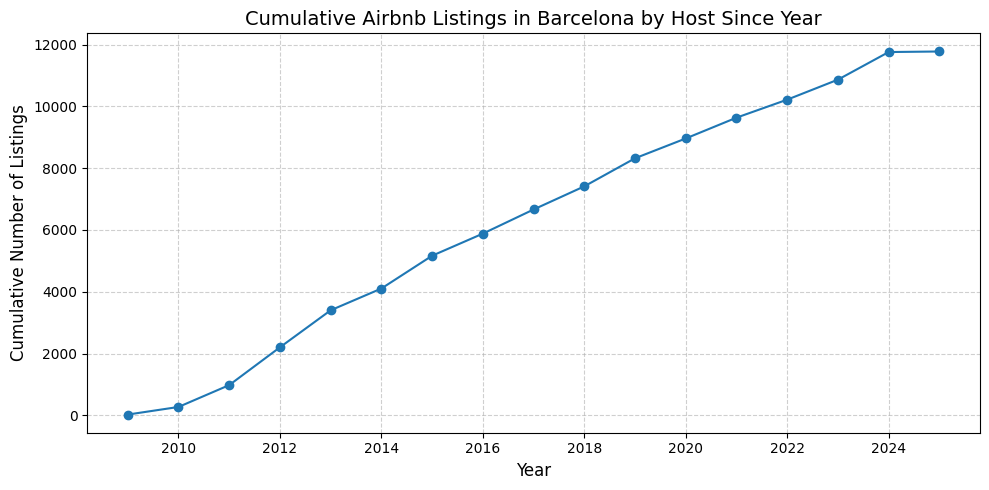

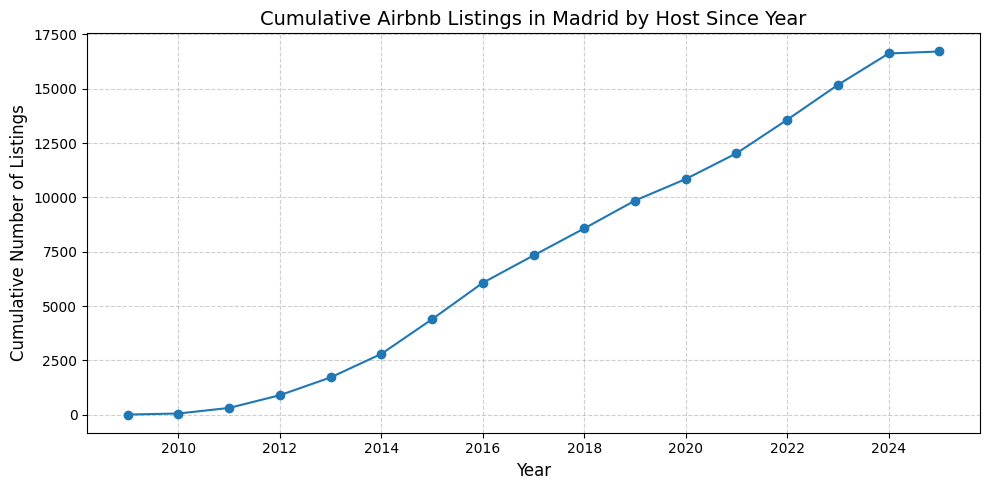

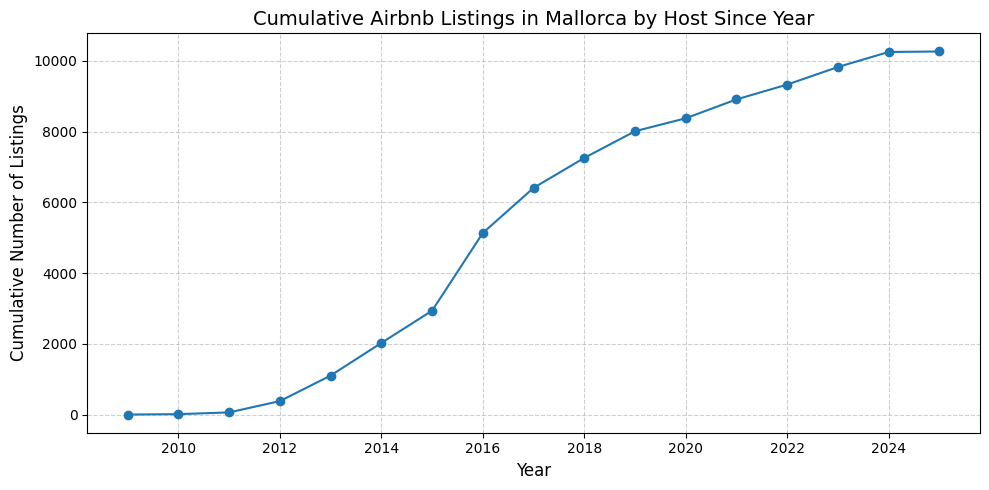

[    2    14    63   383  1105  2027  2938  5135  6409  7256  8010  8377
  8910  9329  9826 10250]


In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# ───────────────────────────────────────────
# 1. BARCELONA
# ───────────────────────────────────────────
data_bcn = df_bcn.copy()

data_bcn['host_since'] = pd.to_datetime(data_bcn['host_since'], errors='coerce')
data_bcn['year'] = data_bcn['host_since'].dt.year

yearly_bcn = (
    data_bcn.dropna(subset=['year'])
            .groupby('year')['id']
            .nunique()
            .sort_index()
)
cumul_bcn = yearly_bcn.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(cumul_bcn.index, cumul_bcn.values, marker='o')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Number of Listings', fontsize=12)
plt.title('Cumulative Airbnb Listings in Barcelona by Host Since Year', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ───────────────────────────────────────────
# 2. MADRID
# ───────────────────────────────────────────
data_mad = df_mad.copy()

data_mad['host_since'] = pd.to_datetime(data_mad['host_since'], errors='coerce')
data_mad['year'] = data_mad['host_since'].dt.year

yearly_mad = (
    data_mad.dropna(subset=['year'])
            .groupby('year')['id']
            .nunique()
            .sort_index()
)
cumul_mad = yearly_mad.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(cumul_mad.index, cumul_mad.values, marker='o')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Number of Listings', fontsize=12)
plt.title('Cumulative Airbnb Listings in Madrid by Host Since Year', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ───────────────────────────────────────────
# 3. MALLORCA
# ───────────────────────────────────────────
data_mall = df_mall.copy()

data_mall['host_since'] = pd.to_datetime(data_mall['host_since'], errors='coerce')
data_mall['year'] = data_mall['host_since'].dt.year

yearly_mall = (
    data_mall.dropna(subset=['year'])
             .groupby('year')['id']
             .nunique()
             .sort_index()
)
cumul_mall = yearly_mall.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(cumul_mall.index, cumul_mall.values, marker='o')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Number of Listings', fontsize=12)
plt.title('Cumulative Airbnb Listings in Mallorca by Host Since Year', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ───────────────────────────────────────────
# 4. SI NECESITAS EL VECTOR DE LISTINGS ACUMULADOS DE LA ÚLTIMA CIUDAD
# ───────────────────────────────────────────
airbnbs = cumul_mall.values[:-1]   # del gráfico de Mallorca (ajusta si prefieres otro)
print(airbnbs)


In [ ]:

# # 1. Filter to Barcelona
# barcelona_data = df_prices[df_prices['city'].str.lower() == 'barcelona'].copy()

# # 2. Extract the year from the 'date' column (e.g. "Marzo 2018" → 2018)
# barcelona_data['Year'] = barcelona_data['date'].str.split().str[-1].astype(int)
# barcelona_data = barcelona_data.sort_values(by='Year')

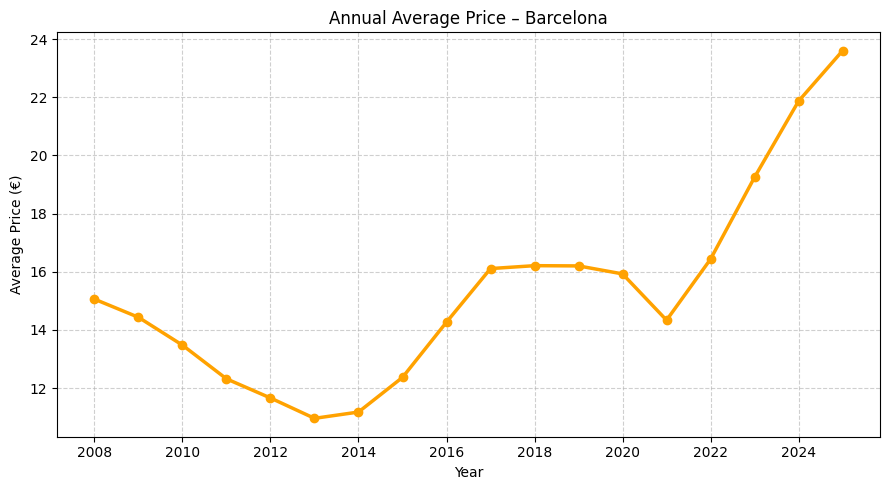

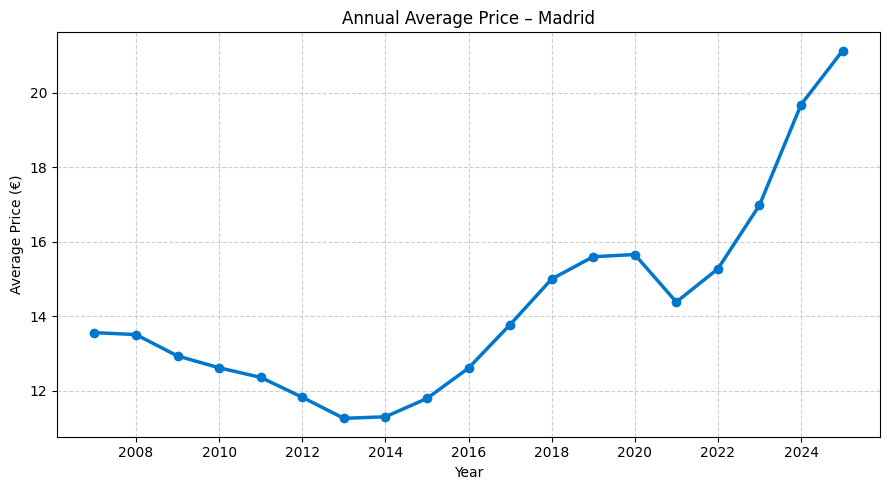

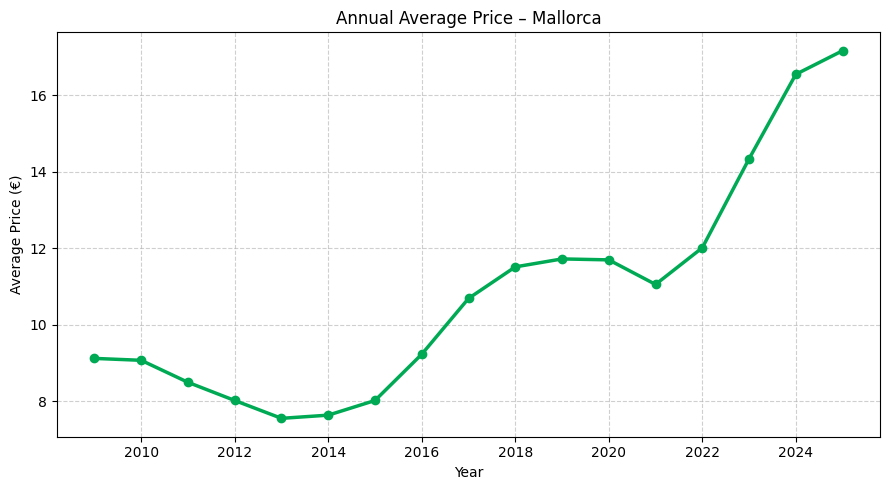

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ────────────────────────────────────────────────
# UTILIDAD PARA PARSEAR LA COLUMNA "date" UNA SOLA VEZ
# (se hace antes de los tres bloques, así df_prices ya queda limpio)
# ────────────────────────────────────────────────
month_map = {
    'Enero': '01', 'Febrero': '02', 'Marzo': '03', 'Abril': '04',
    'Mayo': '05', 'Junio': '06', 'Julio': '07', 'Agosto': '08',
    'Septiembre': '09', 'Octubre': '10', 'Noviembre': '11', 'Diciembre': '12'
}

split_date            = df_prices['date'].str.split()
df_prices['month_name'] = split_date.str[0]
df_prices['year']       = split_date.str[1].astype(int)
df_prices['month_num']  = df_prices['month_name'].map(month_map)
df_prices['date_parsed'] = pd.to_datetime(
    df_prices['year'].astype(str) + '-' + df_prices['month_num'] + '-01',
    format='%Y-%m-%d', errors='coerce'
)
df_prices['price'] = pd.to_numeric(df_prices['price'], errors='coerce')


# ────────────────────────────────────────────────
# 1. BARCELONA
# ────────────────────────────────────────────────
df_bcn = (
    df_prices[df_prices['city'].str.lower() == 'barcelona']
      .dropna(subset=['price'])
)

annual_bcn = (
    df_bcn.groupby('year')['price']
          .mean()
          .reset_index(name='avg_price')
          .sort_values('year')
)

plt.figure(figsize=(9, 5))
plt.plot(annual_bcn['year'], annual_bcn['avg_price'],
         marker='o', linewidth=2.5, color='#FFA200')
plt.xlabel('Year'); plt.ylabel('Average Price (€)')
plt.title('Annual Average Price – Barcelona')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout(); plt.show()


# ────────────────────────────────────────────────
# 2. MADRID
# ────────────────────────────────────────────────
df_mad_prices = (
    df_prices[df_prices['city'].str.lower() == 'madrid']
      .dropna(subset=['price'])
)

annual_mad = (
    df_mad_prices.groupby('year')['price']
                 .mean()
                 .reset_index(name='avg_price')
                 .sort_values('year')
)

plt.figure(figsize=(9, 5))
plt.plot(annual_mad['year'], annual_mad['avg_price'],
         marker='o', linewidth=2.5, color='#0077CC')
plt.xlabel('Year'); plt.ylabel('Average Price (€)')
plt.title('Annual Average Price – Madrid')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout(); plt.show()


# ────────────────────────────────────────────────
# 3. MALLORCA / PALMA
# ────────────────────────────────────────────────
df_mall_prices = (
    df_prices[df_prices['city'].str.lower().str.contains('mallorca|palma')]
      .dropna(subset=['price'])
)

annual_mall = (
    df_mall_prices.groupby('year')['price']
                  .mean()
                  .reset_index(name='avg_price')
                  .sort_values('year')
)

plt.figure(figsize=(9, 5))
plt.plot(annual_mall['year'], annual_mall['avg_price'],
         marker='o', linewidth=2.5, color='#00AA55')
plt.xlabel('Year'); plt.ylabel('Average Price (€)')
plt.title('Annual Average Price – Mallorca')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout(); plt.show()


In [194]:
# ---------------------------------------------------------------------
# 0. LIBRERÍAS
# ---------------------------------------------------------------------
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import (ColumnDataSource, Range1d, LinearAxis,
                          HoverTool, Legend)
from bokeh.palettes import Category10

output_notebook()      # muestra la figura en Jupyter/Notebook

# ---------------------------------------------------------------------
# 1. PREPARAR LOS DATOS EN UN SOLO DATAFRAME
# (rellenamos huecos con NaN para que los índices coincidan)
# ---------------------------------------------------------------------
years = sorted(set(price_bcn.index) | set(price_mad.index) | set(price_mall.index))
data = pd.DataFrame(index=years)

data['price_bcn']  = price_bcn
data['price_mad']  = price_mad
data['price_mall'] = price_mall

data['cumul_bcn']  = cumul_bcn
data['cumul_mad']  = cumul_mad
data['cumul_mall'] = cumul_mall

data.reset_index(inplace=True)
data.rename(columns={'index': 'year'}, inplace=True)

source = ColumnDataSource(data)

# ---------------------------------------------------------------------
# 2. FIGURA BOKEH CON EJE DOBLE
# ---------------------------------------------------------------------
p = figure(
    width = 950,          # antes: plot_width
    height = 500,         # antes: plot_height
    x_axis_type = 'linear',
    title = 'Housing Price vs. Cumulative Airbnb Listings – Barcelona, Madrid y Mallorca',
    toolbar_location = 'above'
)

# Eje Y izquierdo → precio medio
p.yaxis.axis_label = 'Average Housing Price (€)'

# Eje Y derecho → listings acumulados
max_listings = data[['cumul_bcn', 'cumul_mad', 'cumul_mall']].max().max()
p.extra_y_ranges = {"listings": Range1d(start=0, end=max_listings*1.1)}
p.add_layout(LinearAxis(y_range_name="listings",
                        axis_label="Cumulative Listings"),
             'right')

# Colores para cada ciudad
colors = Category10[3]      # 3 colores distintos

# ---------------------------------------------------------------------
# 3. DIBUJAR LÍNEAS (PRECIO + LISTINGS) DE CADA CIUDAD
#    — mismo color, trazo distinto —
# ---------------------------------------------------------------------
cities = [
    ('Barcelona', 'price_bcn',  'cumul_bcn'),
    ('Madrid',    'price_mad',  'cumul_mad'),
    ('Mallorca',  'price_mall', 'cumul_mall')
]

legend_items = []

for i, (city, price_col, cumul_col) in enumerate(cities):
    # precio medio  (línea continua)
    price_r = p.line('year', price_col,
                     source=source,
                     color=colors[i],
                     line_width=2.5,
                     legend_label=f'{city} – Price')

    # listings acumulados (línea punteada) en el eje secundario
    list_r = p.line('year', cumul_col,
                    source=source,
                    y_range_name='listings',
                    color=colors[i],
                    line_width=2,
                    line_dash='dotted',
                    legend_label=f'{city} – Listings')

# ---------------------------------------------------------------------
# 4. HERRAMIENTAS Y ASPECTO
# ---------------------------------------------------------------------
p.add_tools(HoverTool(
    tooltips=[
        ("Year", "@year"),
        ("Price (€)", "$y{0,0.0}")
    ],
    mode='vline',
    renderers=[price_r]   # con hover sólo sobre las líneas de precios
))

p.legend.location = 'top_left'
p.legend.click_policy = 'hide'   # permite hacer clic para ocultar/mostrar líneas
p.grid.grid_line_alpha = 0.35

# ---------------------------------------------------------------------
# 5. MOSTRAR
# ---------------------------------------------------------------------
show(p)



Loading BokehJS ...

In [195]:
from bokeh.plotting import figure, show
from bokeh.models import Range1d, LinearAxis, NumeralTickFormatter
from bokeh.palettes import Category10

# -------------------------------------------------------
# 1. FIGURA con rango Y inicial SOLO para precios
# -------------------------------------------------------
min_price = data[['price_bcn', 'price_mad', 'price_mall']].min().min()
max_price = data[['price_bcn', 'price_mad', 'price_mall']].max().max()

p = figure(
    width=950,
    height=500,
    x_axis_type='linear',
    title='Housing Price vs. Cumulative Airbnb Listings – Barcelona, Madrid y Mallorca',
    toolbar_location='above',
    y_range=Range1d(start=min_price*0.95, end=max_price*1.05),  # rango precios
)
p.yaxis.axis_label = 'Average Housing Price (€)'
p.yaxis.formatter = NumeralTickFormatter(format='0,0')

# -------------------------------------------------------
# 2. Añadir el eje extra para listings
# -------------------------------------------------------
max_listings = data[['cumul_bcn', 'cumul_mad', 'cumul_mall']].max().max()
p.extra_y_ranges = {
    "listings": Range1d(start=0, end=max_listings*1.1)
}
p.add_layout(
    LinearAxis(y_range_name="listings", axis_label="Cumulative Listings"),
    'right'
)

# -------------------------------------------------------
# 3. Dibujar líneas – asignar rango correcto a cada métrica
# -------------------------------------------------------
colors = Category10[3]
cities = [
    ('Barcelona', 'price_bcn',  'cumul_bcn'),
    ('Madrid',    'price_mad',  'cumul_mad'),
    ('Mallorca',  'price_mall', 'cumul_mall')
]

for i, (city, price_col, cumul_col) in enumerate(cities):
    # ― Precios (eje izquierdo, rango por defecto) ―
    p.line('year', price_col,
           source=source,
           color=colors[i],
           line_width=3,
           legend_label=f'{city} – Price')
    
    # ― Listings (eje derecho, rango "listings") ―
    p.line('year', cumul_col,
           source=source,
           y_range_name='listings',   # <- ¡clave!
           color=colors[i],
           line_width=2,
           line_dash='dotted',
           legend_label=f'{city} – Listings')

# -------------------------------------------------------
# 4. Extras de estilo
# -------------------------------------------------------
p.legend.location = 'top_left'
p.legend.click_policy = 'hide'
p.grid.grid_line_alpha = 0.35

show(p)


In [197]:
# ---------------------------------------------------------------
# 0 · LIBRERÍAS
# ---------------------------------------------------------------
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import (
    ColumnDataSource, Range1d, LinearAxis, NumeralTickFormatter,
    CheckboxButtonGroup, CustomJS, HoverTool
)
from bokeh.layouts import column, row
from bokeh.palettes import Category10

output_notebook()                       # Jupyter / Notebook

# ---------------------------------------------------------------
# 1 · PREPARAR DATOS (utiliza tus Series ya calculadas)
# ---------------------------------------------------------------
years = sorted(set(price_bcn.index)
               | set(price_mad.index)
               | set(price_mall.index))

data = pd.DataFrame(index=years)
data['price_bcn']  = price_bcn
data['price_mad']  = price_mad
data['price_mall'] = price_mall
data['list_bcn']   = cumul_bcn
data['list_mad']   = cumul_mad
data['list_mall']  = cumul_mall

data.reset_index(inplace=True)
data.rename(columns={'index': 'year'}, inplace=True)

source = ColumnDataSource(data)

# ---------------------------------------------------------------
# 2 · FIGURA CON RANGO FIJO PARA PRECIOS
# ---------------------------------------------------------------
min_price = data[['price_bcn', 'price_mad', 'price_mall']].min().min()
max_price = data[['price_bcn', 'price_mad', 'price_mall']].max().max()

p = figure(
    width=900, height=460,
    x_axis_type='linear',
    title='Housing Price vs. Cumulative Airbnb Listings',
    toolbar_location='above',
    y_range=Range1d(start=min_price*0.95, end=max_price*1.05)
)
p.yaxis.axis_label = 'Average Housing Price (€)'
p.yaxis.formatter = NumeralTickFormatter(format='0,0')

# — Eje derecho (listings) —
max_listings = data[['list_bcn','list_mad','list_mall']].max().max()
p.extra_y_ranges = {"listings": Range1d(start=0, end=max_listings*1.1)}
p.add_layout(
    LinearAxis(y_range_name="listings", axis_label="Cumulative Listings"), 'right'
)

# ---------------------------------------------------------------
# 3 · DIBUJO DE LAS 6 LÍNEAS (precio + listings por ciudad)
# ---------------------------------------------------------------
colors = Category10[3]
renderers = {}                # guardará GlyphRenderers para el callback

cities = [
    ('bcn',  'Barcelona'),
    ('mad',  'Madrid'),
    ('mall', 'Mallorca')
]

for i, (tag, city) in enumerate(cities):
    # Precios – línea continua (eje izquierdo, rango por defecto)
    r_price = p.line(
        'year', f'price_{tag}',
        source=source,
        color=colors[i],
        line_width=3,
        legend_label=f'{city} – Price'
    )
    renderers[f'price_{tag}'] = r_price  # registrar

    # Listings – línea punteada (eje derecho)
    r_list = p.line(
        'year', f'list_{tag}',
        source=source,
        y_range_name='listings',
        color=colors[i],
        line_width=2,
        line_dash='dotted',
        legend_label=f'{city} – Listings'
    )
    renderers[f'list_{tag}'] = r_list

# Hover solo para los precios (añade otro si quieres para listings)
p.add_tools(HoverTool(
    tooltips=[("Year", "@year"), ("Price (€)", "$y{0,0}")],
    mode='vline',
    renderers=[r for key, r in renderers.items() if key.startswith('price')]
))

p.legend.visible = False      # usamos nuestros widgets; la leyenda nativa sobra
p.grid.grid_line_alpha = 0.35

# ---------------------------------------------------------------
# 4 · WIDGETS DE FILTRADO
# ---------------------------------------------------------------
metric_sel = CheckboxButtonGroup(
    labels=["Prices", "Listings"],
    active=[0, 1]         # por defecto ambos activos
)
city_sel = CheckboxButtonGroup(
    labels=["Barcelona", "Madrid", "Mallorca"],
    active=[0, 1, 2]
)

# ---------------------------------------------------------------
# 5 · CALLBACK JAVASCRIPT
# ---------------------------------------------------------------
callback = CustomJS(
    args=dict(rend=renderers, met_sel=metric_sel, city_sel=city_sel),
    code="""
    // Mapa de métricas activas
    const metric_on = {price: false, list: false};
    for (const idx of met_sel.active) {
        if (idx === 0) metric_on.price = true;
        if (idx === 1) metric_on.list  = true;
    }

    // Mapa de ciudades activas
    const city_on = {bcn: false, mad: false, mall: false};
    for (const idx of city_sel.active) {
        if (idx === 0) city_on.bcn  = true;
        if (idx === 1) city_on.mad  = true;
        if (idx === 2) city_on.mall = true;
    }

    // Ajustar visibilidad de cada renderer
    for (const [key, glyph] of Object.entries(rend)) {
        // key: "price_bcn" o "list_mad", etc.
        const [metric, city] = key.split('_');
        glyph.visible = metric_on[metric] && city_on[city];
    }
"""
)
metric_sel.js_on_change('active', callback)
city_sel.js_on_change('active',  callback)

# ---------------------------------------------------------------
# 6 · DISEÑO Y MOSTRAR
# ---------------------------------------------------------------
layout = column(p, row(metric_sel, city_sel, sizing_mode="stretch_width"))
show(layout)


Loading BokehJS ...

In [201]:
# ---------------------------------------------------------------
# 0 · LIBRERÍAS
# ---------------------------------------------------------------
import bokeh, pandas as pd
from packaging import version
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import (
    ColumnDataSource, Range1d, LinearAxis, NumeralTickFormatter,
    HoverTool, CustomJS
)
from bokeh.palettes import Category10

output_notebook()              #  usa output_file("graf.html") si quieres guardarlo

# ---------------------------------------------------------------
# 1 · PREPARAR DATOS  (las Series que ya tienes)
# ---------------------------------------------------------------
years = sorted(set(price_bcn.index)
               | set(price_mad.index)
               | set(price_mall.index))

data = pd.DataFrame(index=years)
data['price_bcn']  = price_bcn
data['price_mad']  = price_mad
data['price_mall'] = price_mall
data['list_bcn']   = cumul_bcn
data['list_mad']   = cumul_mad
data['list_mall']  = cumul_mall

data.reset_index(inplace=True)
data.rename(columns={'index': 'year'}, inplace=True)
src = ColumnDataSource(data)

# ---------------------------------------------------------------
# 2 · FIGURA con eje doble
# ---------------------------------------------------------------
min_p = data[['price_bcn','price_mad','price_mall']].min().min()
max_p = data[['price_bcn','price_mad','price_mall']].max().max()

p = figure(
    width=900, height=460,
    y_range=Range1d(min_p*0.95, max_p*1.05),
    title='Housing Price vs. Cumulative Airbnb Listings',
    toolbar_location="above",
)
p.yaxis.axis_label = 'Average Housing Price (€)'
p.yaxis.formatter  = NumeralTickFormatter(format='0,0')

max_l = data[['list_bcn','list_mad','list_mall']].max().max()
p.extra_y_ranges = {"listings": Range1d(0, max_l*1.1)}
p.add_layout(LinearAxis(y_range_name="listings",
                        axis_label="Cumulative Listings"),
             'right')

colors = Category10[3]
render = {}
for i, (tag, city) in enumerate([('bcn','Barcelona'),
                                 ('mad','Madrid'),
                                 ('mall','Mallorca')]):
    render[f'price_{tag}'] = p.line('year', f'price_{tag}',
                                    source=src, color=colors[i],
                                    line_width=3)
    render[f'list_{tag}']  = p.line('year', f'list_{tag}',
                                    source=src, color=colors[i],
                                    y_range_name='listings',
                                    line_dash='dotted', line_width=2)

p.add_tools(HoverTool(
    tooltips=[("Year","@year"),("Price (€)","$y{0,0}")],
    mode='vline',
    renderers=[r for k,r in render.items() if k.startswith('price')]
))
p.legend.visible = False
p.grid.grid_line_alpha = 0.35

# ---------------------------------------------------------------
# 3 · CONTROLES – elige A o B
# ---------------------------------------------------------------
use_tool_dropdown = (version.parse(bokeh.__version__) >= version.parse("3.2.0"))

if use_tool_dropdown:
    # ---------- A · Dropdowns como TOOLS en la toolbar ----------
    from bokeh.models.tools import Dropdown  # <-- importante, módulo tools
    metric_dd = Dropdown(label="Series: Both",
                         menu=[("Prices","price"),("Listings","list"),("Both","both")])
    city_dd   = Dropdown(label="City: All",
                         menu=[("Barcelona","bcn"),("Madrid","mad"),
                               ("Mallorca","mall"),("All","all")])

    # Callback JS (igual que antes)
    callback = CustomJS(args=dict(r=render, m_dd=metric_dd, c_dd=city_dd), code="""
        const m = m_dd.item ?? 'both';
        const c = c_dd.item ?? 'all';
        for (const [key, glyph] of Object.entries(r)) {
            const [kind, city] = key.split('_');
            glyph.visible = (m==='both'||m===kind) && (c==='all'||c===city);
        }
        m_dd.label = `Series: ${m==='both'?'Both':m==='price'?'Prices':'Listings'}`;
        const mapCity = {bcn:'Barcelona', mad:'Madrid', mall:'Mallorca', all:'All'};
        c_dd.label = `City: ${mapCity[c]}`;
    """)
    metric_dd.js_on_event("menu_item_click", callback)
    city_dd.js_on_event("menu_item_click",   callback)

    p.add_tools(metric_dd, city_dd)        # ← ahora sí es válido

    show(p)                                # layout = solo la figura

else:
    # ---------- B · Widget-dropdowns pegados arriba ----------
    from bokeh.models.widgets import Dropdown   # ya lo tenías
    from bokeh.layouts import column, row

    metric_dd = Dropdown(label="Series: Both",
                         menu=[("Prices","price"),("Listings","list"),("Both","both")])
    city_dd   = Dropdown(label="City: All",
                         menu=[("Barcelona","bcn"),("Madrid","mad"),
                               ("Mallorca","mall"),("All","all")])

    callback = CustomJS(args=dict(r=render, m_dd=metric_dd, c_dd=city_dd), code="""
        const m = cb_obj.item ?? 'both';   // cb_obj = metric_dd o city_dd
        if (['price','list','both'].includes(m)) m_dd.value = m;
        else                                    c_dd.value = m;

        const met = m_dd.value || 'both';
        const cit = c_dd.value || 'all';

        for (const [key, glyph] of Object.entries(r)) {
            const [kind, city] = key.split('_');
            glyph.visible = (met==='both'||met===kind) && (cit==='all'||cit===city);
        }
        m_dd.label = `Series: ${met==='both'?'Both':met==='price'?'Prices':'Listings'}`;
        const mapCity = {bcn:'Barcelona', mad:'Madrid', mall:'Mallorca', all:'All'};
        c_dd.label = `City: ${mapCity[cit]}`;
    """)
    metric_dd.js_on_event("menu_item_click", callback)
    city_dd.js_on_event("menu_item_click",   callback)

    top_bar = row(metric_dd, city_dd, sizing_mode="stretch_width",
                  margin=(0,0,4,0))       #
         # si prefieres fichero: output_file("graf_airbnb.html"); show(p)


Loading BokehJS ...

C:\Users\silvi\AppData\Local\Temp\ipykernel_404\2435927424.py:73: UserWarning: 
You are attempting to set `plot.legend.visible` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.visible = False


ImportError: cannot import name 'Dropdown' from 'bokeh.models.tools' (C:\Users\silvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bokeh\models\tools.py)